In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *
import tensorflow as tf
import tensorflow_data_validation as tfdv
import time
import warnings
from tensorflow_metadata.proto.v0 import schema_pb2
warnings.simplefilter('ignore')

In [2]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [3]:
start_time = time.time()
print(is_acceptable(clean_fb[0:5], dirty_fb[5:6],method='tfdv'))
print("Finished in: {:.2f} seconds".format(time.time()-start_time))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Schema successfully updated for all 5 files
True
Finished in: 36.52 seconds


In [ ]:
start_time = time.time()
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size, 'tfdv')
            fb_analysis.loc[counter] = row
            counter = counter + 1
            fb_analysis.to_csv('fb_batch_analysis_tfdv.csv', index = False)
            print("saved file for train_type {}, batch_size {}, and i {}".format(train_type,batch_size,i))
        
#fb_analysis.to_csv('fb_batch_analysis_tfdv.csv', index = False)
print("Finished in: {:.2f} hours".format(time.time()-start_time)/120)

Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 0
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 1
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 2
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 3
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 4
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_size 1, and i 5
Schema successfully updated for all 1 files
Schema successfully updated for all 1 files
saved file for train_type rolling, batch_s

In [23]:
fb_analysis = pd.read_csv('fb_batch_analysis_tfdv_compiled.csv')

In [24]:
fb_accuracy = get_accuracy(fb_analysis)
fb_accuracy.to_csv('fb_accuracy_tfdv.csv', index = False)

In [25]:
fb_analysis

,train_type,batch_size,test_batch,clean_correct,dirty_correct
0,increasing,1,0,False,True
1,increasing,1,1,True,False
2,increasing,1,2,True,False
3,increasing,1,3,True,False
4,increasing,1,4,True,False
...,...,...,...,...,...
859,rolling,9,39,True,False
860,rolling,9,40,True,False
861,rolling,9,41,True,False
862,rolling,9,42,True,False


In [26]:
a = fb_analysis[fb_analysis.test_batch.isnull() == False].groupby(['train_type', 'batch_size']).agg({'batch_size': 'count', 'clean_correct':'sum', 'dirty_correct':'sum'})


In [ ]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1,2):#range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size, 'tfdv')
            flights_analysis.loc[counter] = row
            counter = counter + 1
flights_analysis.to_csv('flights_batch_analysis_tfdv.csv', index = False)

In [8]:
flights_analysis = pd.read_csv('flights_batch_analysis_tfdv.csv')

In [9]:
flights_accuracy = get_accuracy(flights_analysis)
flights_accuracy.to_csv('flights_accuracy_tfdv.csv', index = False)

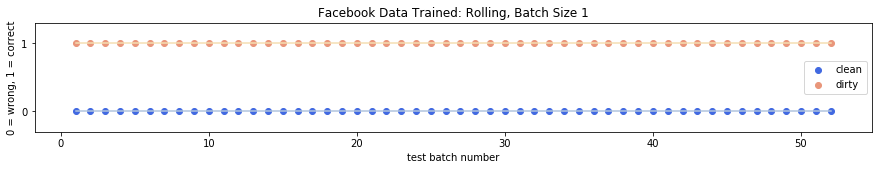

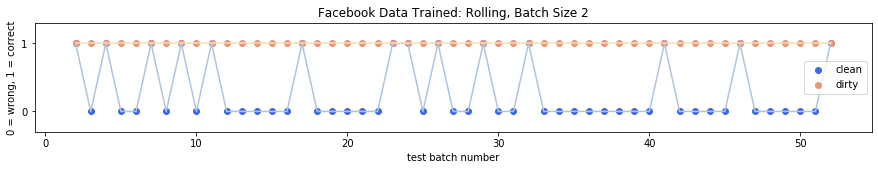

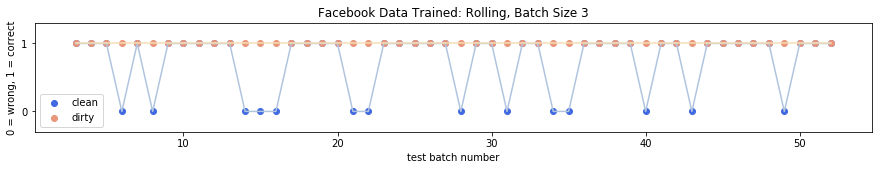

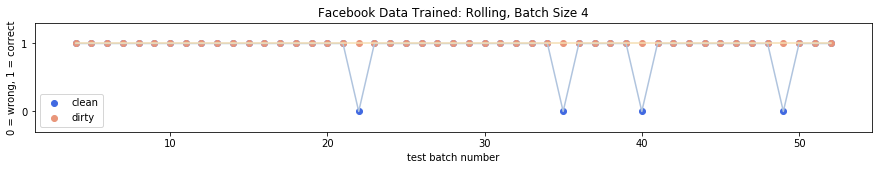

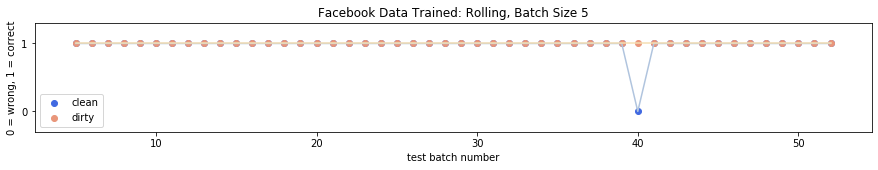

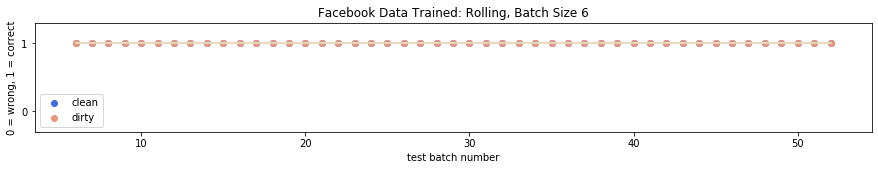

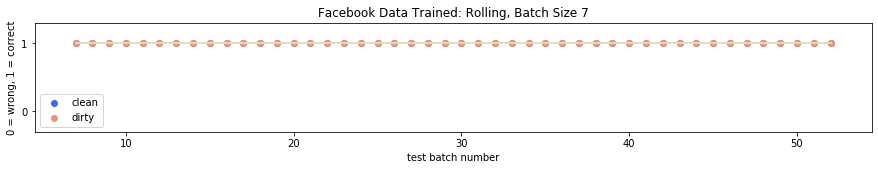

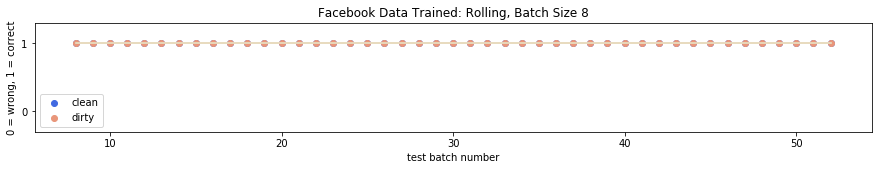

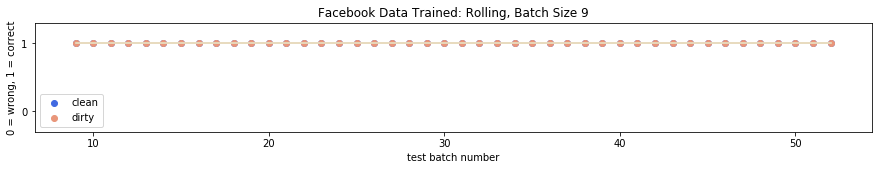

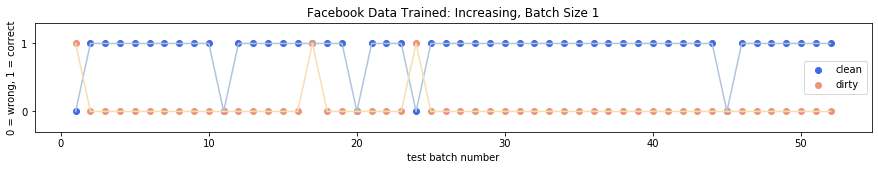

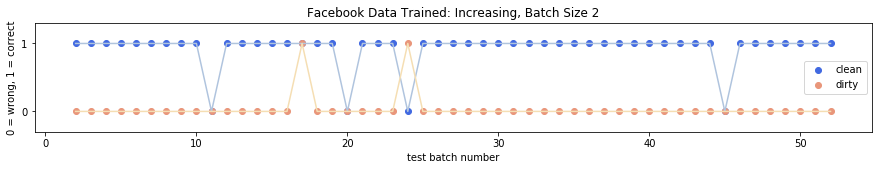

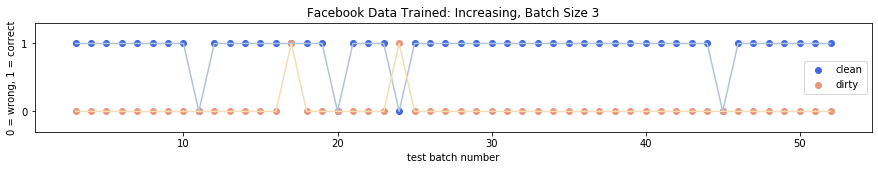

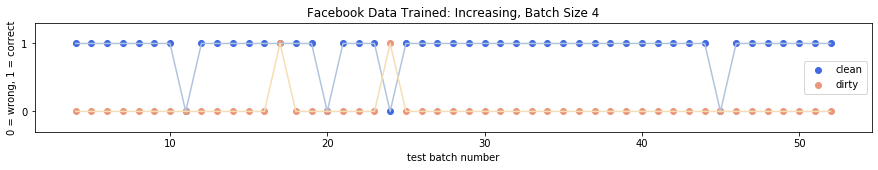

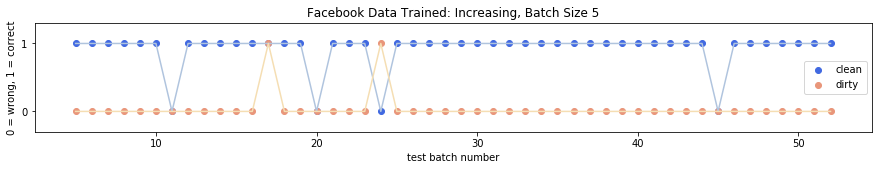

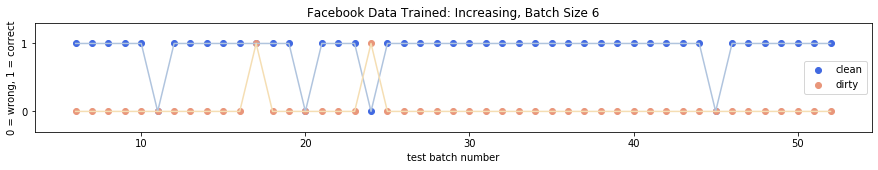

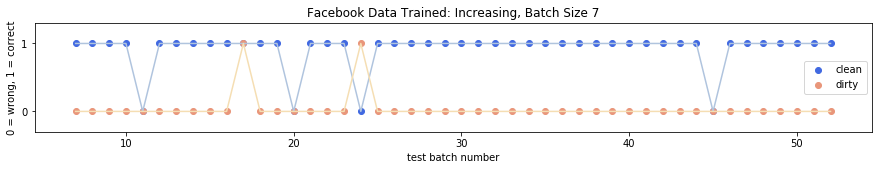

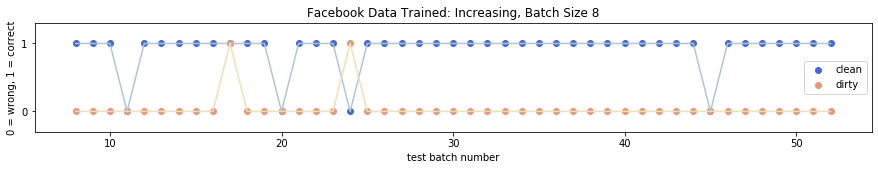

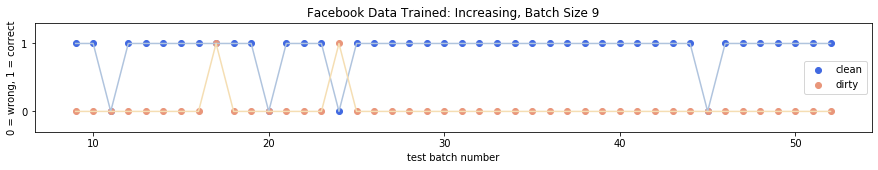

In [10]:
plot_batch('facebook', fb_analysis, range(1, 10))

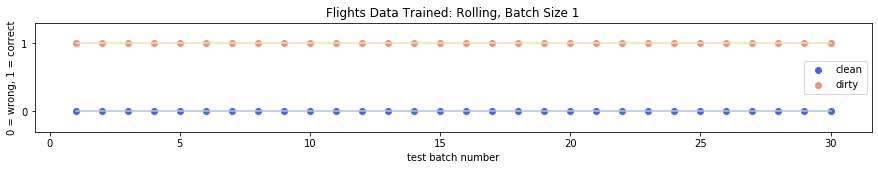

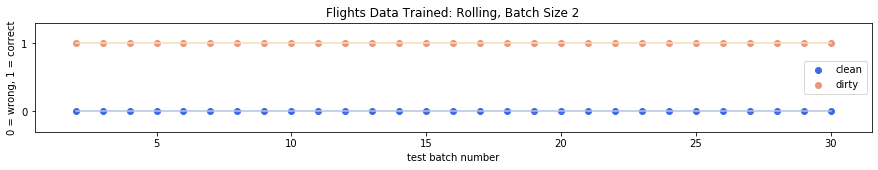

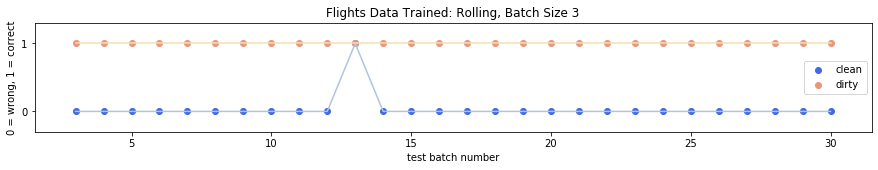

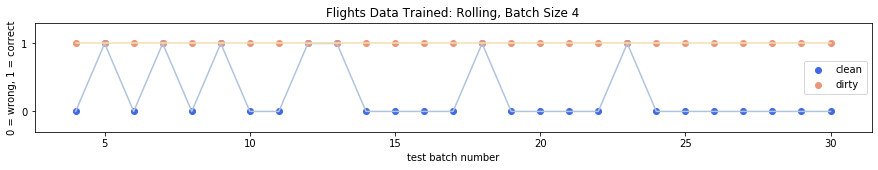

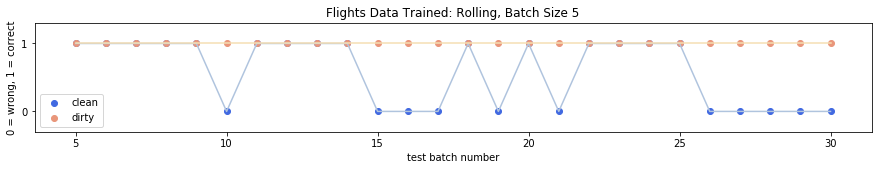

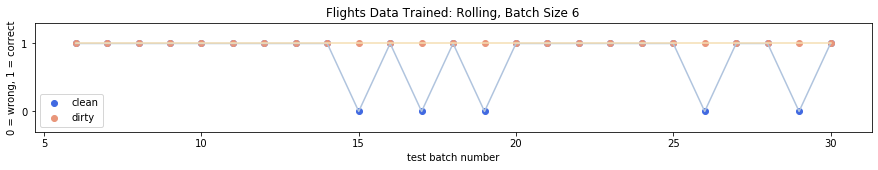

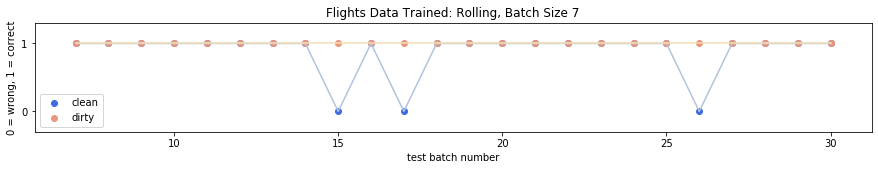

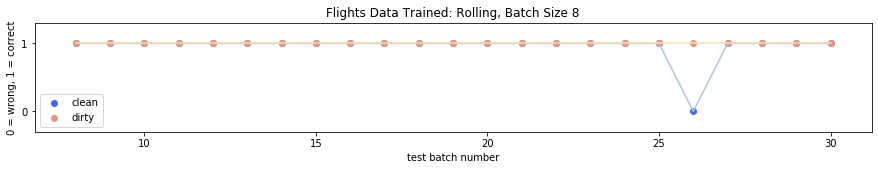

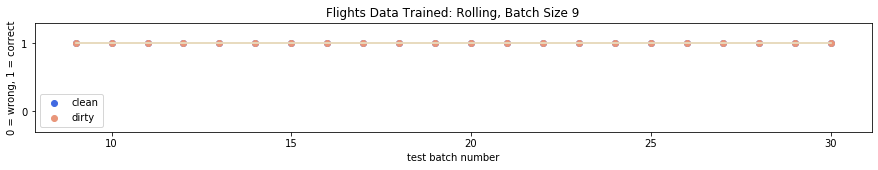

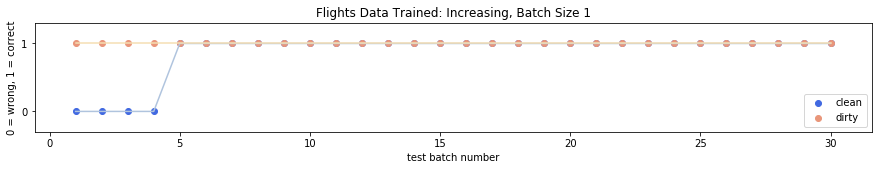

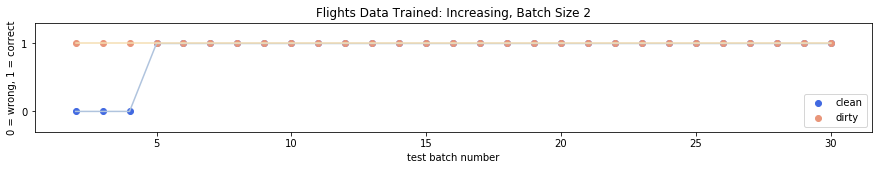

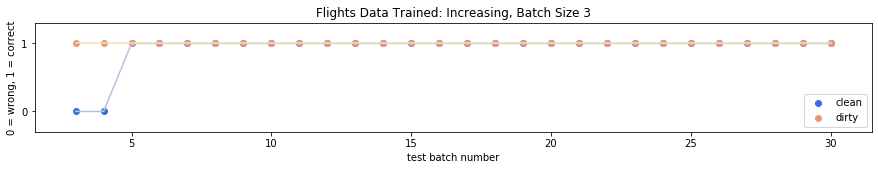

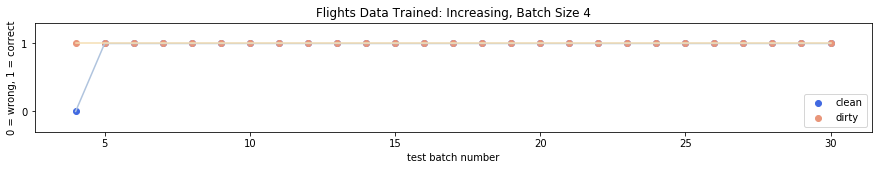

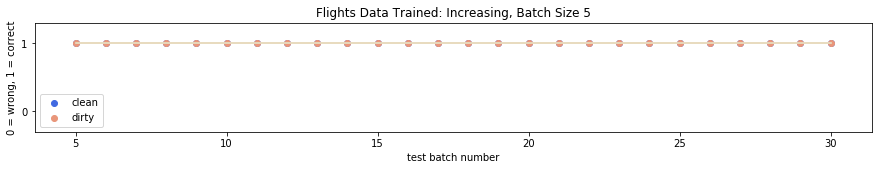

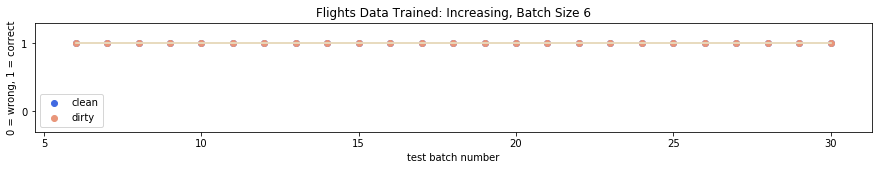

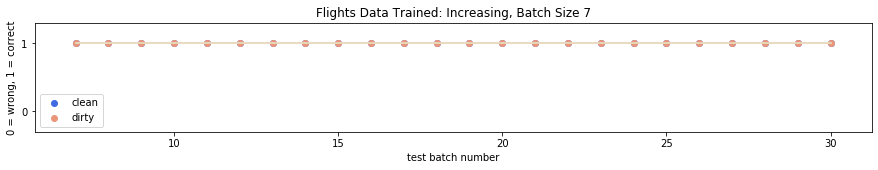

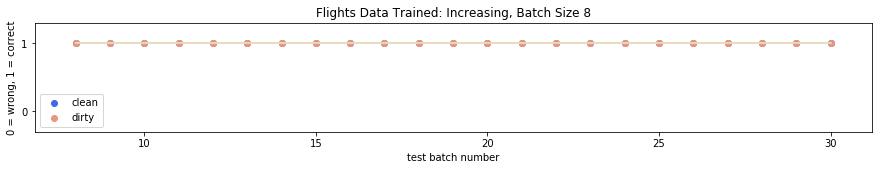

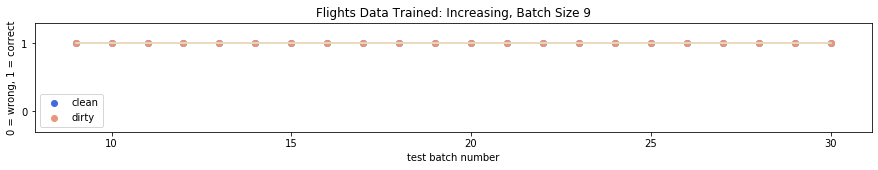

In [11]:
plot_batch('flights', flights_analysis, range(1, 10))